In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from frac_cloud import frac_physics,readSHDOMRad,setProp

# Generating a fractal cloud 
    

/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:203: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  lwp.show()


File already exist. Replace?:  n


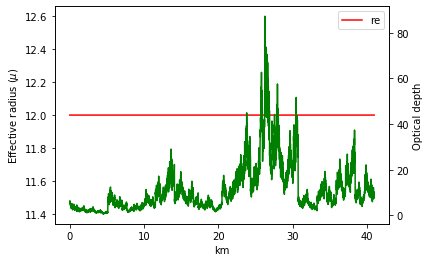

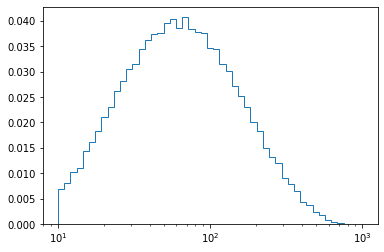

In [57]:
re = 12 # um
lwp = 90 # g/m^2
fc = frac_physics('fractal1_example',dpath=None)
fc.generate_fractal(re,lwp)
fc.plot_cld()
fc.plot_lwp_pdf()
fc.save_frach5('fractal1_example')

# Reading previously-generated fractal cloud

/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:203: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  lwp.show()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaae600ed68>)

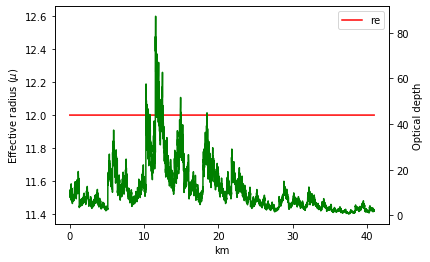

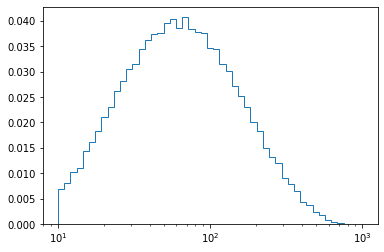

In [41]:
fc = frac_physics('fractal_phys',dpath=None)
fc.read_frach5('fractal_phys.hdf5')
fc.plot_cld()
fc.plot_lwp_pdf()

/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:218: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/frac_shdom_unpol/frac_cloud.py:203: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  lwp.show()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaadb9eebe0>)

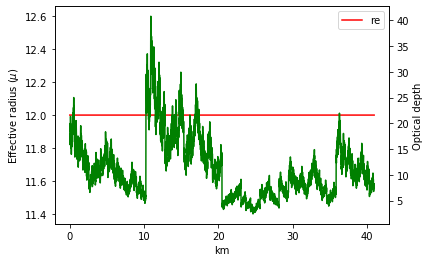

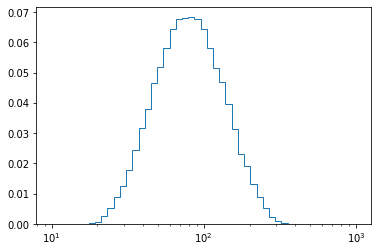

In [2]:
#Spot3D_paper fractal cloud
fc = frac_physics('spot3D_fractal.hdf5',dpath=None)
fc.read_frach5()
fc.plot_cld()
fc.plot_lwp_pdf()

# SHDOM

In [3]:

wvl = '0.865' #um Wavelength
cer = '12' #um Cloud Effective Radius
sfname = 'spot3D'+wvl+'CER'+cer
SZA = 60 # degrees
SAA = 0 # degrees
VZA = 0

#Creating Mie Scattering Table
cr = [] #checking system commands
sfname = sfname.replace('.','p')
cm1 = "sed \'s/<WLN>/"+wvl+"/g\' run_mie > tmp1"
cm2 = "sed \'s/<CER>/"+cer+"/g\' tmp1 > tmp2"
cm3 = "sed \'s/<NAME>/"+sfname+".scat/g\' tmp2 > tmp3"
cr= np.append(cr,os.system(cm1))
cr= np.append(cr,os.system(cm2))
cr= np.append(cr,os.system(cm3))
cr= np.append(cr,os.system('chmod +x tmp3'))
cr= np.append(cr,os.system('./tmp3'))
cr= np.append(cr,os.system('rm tmp*'))
scat_file = sfname.replace('.','p')+'.scat'
print('Mie Scattering table ...')
print(cr)
#Generating *.prp file for SHDOM
setProp(scat_file, wvl,fc)

#Running SHDOM
mu_SZA = np.cos(np.deg2rad(SZA))
mu_VZA = np.cos(np.deg2rad(VZA))
cm1 = "sed \'s/<PRPN>/"+sfname+".prp/g\' run_shdom > tmp1"
cm2 = "sed \'s/<BASN>/"+sfname+"/g\' tmp1 > tmp2"
cm3 = "sed \'s/<WVL>/"+wvl+"/g\' tmp2 > tmp3"
cm4 = "sed \'s/<MSZA>/%0.2f"%mu_SZA+"/g\' tmp3 > tmp4"
cm5 = "sed \'s/<DSAA>/%0.1f"%(SAA)+"/g\' tmp4 > tmp5"
cm6 = "sed \'s/<MVZA>/%0.1f"%(mu_VZA)+"/g\' tmp5 > tmp6"
cr =[os.system(st) for st in [cm1,cm2,cm3,cm4,cm5,cm6]]
cr =np.append(cr,os.system('chmod +x tmp6'))
cr =np.append(cr,os.system('./tmp6'))
cr =np.append(cr,os.system('rm tmp*'))
print('SHDOM run ...')
print(cr)

Mie Scattering table ...
[0. 0. 0. 0. 0. 0.]
4096 1
wv: 0.865
40.79159 12 (4096,) (4096,)
nphase: 1
spot3D0p865CER12.scat
40.79159 12 (4096,) (4096,)
spot3D0p865CER12.prp SAVED !!
SHDOM run ...
[0 0 0 0 0 0 0 0 0]


# Analyzing

In [4]:
Rad,VZA,VAA,SZA,SAA = readSHDOMRad(sfname+'r.out')

Text(0.5, 0, 'km')

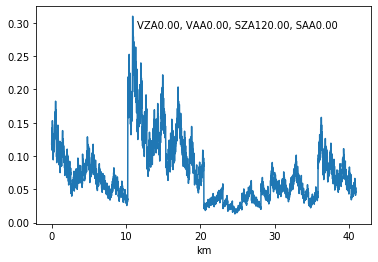

In [5]:
fig1,ax1 = plt.subplots()
fig1_ttl = sfname+'r.out'
ax1.plot(fc.x,np.pi*Rad[0,:]/np.cos(np.deg2rad(180-SZA)))
ax1.text(0.3,0.9,'VZA%0.2f, VAA%0.2f, SZA%0.2f, SAA%0.2f'%(VZA[0],VAA[0],SZA,SAA),  transform = ax1.transAxes)
ax1.set_xlabel('km')



In [6]:
import h5py
f=h5py.File('/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/Toy_clouds/Fractal_Cloud/results/b0p865/'+\
            'fractal_cld_b865re12ve05_x40km_MSCART_SZA120_SAA000_VAA000plus_NPH1e5.hdf5','r')
rdd = f['MeanPRad'][:]

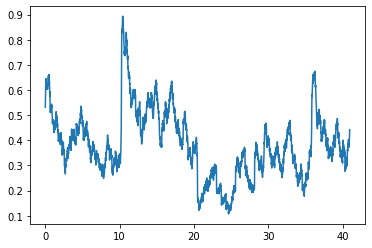

In [7]:
plt.plot(fc.x,rdd[61,:,0])

In [30]:
muphi2

array([  0.5, 180. ])